# Lab4 - NFL clustering
Author: *YOUR NAME HERE*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 0. Function definitions

In [2]:
def add_column_to_dataframe(X, col_vector, col_name, col_type='category'):
    '''Adds a column to DataFrame.
        
        This function does not alter the input DataFrame.
        It creates a copy.
    
        X (pandas.DataFrame): DataFrame to add column to
        col_vector (pandas.Series or numpy.array): Array of values to be added
        col_name (str): Name of the new column
        col_type : valid DataFrame element type
        
        returns: copy of X with new column
    '''
    #TODO: Implement function here (see lecture code)
        

In [3]:
from collections import Counter

def plot_cluster_proportions(labels):
    '''Plot cluster proportions as pie plot.
    
        Uses a collections.Counter to count elements in labels 
        and plots these counts in a matplotlib pie plot
    
        labels (list, numpy.array, pandas.Series): Vector of labels indicating clusters.
        
        returns collections.Counter object with label counts
    '''
    
    #TODO: Implement function here (see lecture code)
    

In [4]:
def plot_cluster_centers(centers, title='Cluster centers per feature on standard scale'):
    '''Plots center means of each cluster as bar-plots in a figure with sub-plots
    
        y-axis limits should be the same for each sub-plot.
        y-axis max and min should be +- 1.01*maximum value found in centers
    
        centers (pandas.DataFrame): Cluster center averages, 
                                    centers.shape = (n_clusters, n_features)
        title (str): Plot title
    
    '''
    
    #TODO: Implement function here (see lecture code)
    
    

## 1. Load dataset

Load the NFL dataset into variables `X` and `y` (we do not need `y`).  
https://www.scikit-yb.org/en/latest/api/datasets/nfl.html

Keep the following features `'Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate'` for rows where `'Tgt'>=20`.

Print the shape of X.

In [5]:
#TODO add your code



(260, 5)

## 2. Scale the dataset with `StandardScaler`

Create a pandas DataFrame in a variable called `X_scaled`, that holds the values of `X` scaled with a `StandardScaler()`.

Column names of `X_scaled` should match `X`.

Print head of `X` and `X_scaled`.

In [6]:
#TODO add your code


print('--- X.head() ---')
print(X.head())

print('\n--- X_scaled.head() ---')
print(X_scaled.head())


--- X.head() ---
   Rec   Yds  TD  Fmb  Ctch_Rate
0  125  1405   9    2      0.850
1  116  1163   8    1      0.744
2  115  1572  11    2      0.706
3  113  1677   8    2      0.665
4  113  1373   9    1      0.739

--- X_scaled.head() ---
        Rec       Yds        TD       Fmb  Ctch_Rate
0  3.447289  2.871321  2.239894  1.017440   1.691943
1  3.083106  2.136636  1.869899  0.126752   0.700260
2  3.042641  3.378314  2.979884  1.017440   0.344750
3  2.961711  3.697083  1.869899  1.017440  -0.038825
4  2.961711  2.774172  2.239894  0.126752   0.653482


## 3. Find the number of clusters with the Elbow method 

Use `yellowbrick.cluster.elbow.kelbow_visualizer()` and `KMeans(random_state=54)` to create  an Elbow plot using the metric `'distortion'`, the scaled data in `X_scaled` for cluster sizes from 2 to 10.

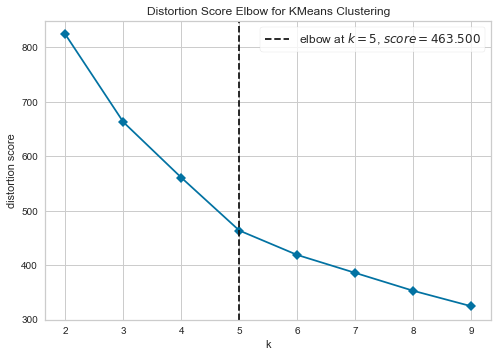

In [7]:
#TODO add your code


In [8]:
# This will reset the color styles to the orginal (seaborn) styles
from yellowbrick.style.rcmod import reset_orig
reset_orig()

## 4. KMeans clustering with 5 clusters
Use `KMeans` and `random_state=54` to cluster the data in `X_scaled` into 5 clusters.

In [9]:
#TODO add your code


KMeans(n_clusters=5, random_state=54)

Add the cluster labels as a column `'clusters'` to `X` with `add_column_to_dataframe()`. 

Print the new `X`.

We will use this column to color the pair-plot.

In [10]:
#TODO add your code


,Rec,Yds,TD,Fmb,Ctch_Rate,clusters
0,125,1405,9,2,0.850,3
1,116,1163,8,1,0.744,3
2,115,1572,11,2,0.706,3
3,113,1677,8,2,0.665,3
4,113,1373,9,1,0.739,3
...,...,...,...,...,...,...
266,12,164,3,0,0.480,0
275,11,80,1,0,0.458,0
277,11,136,1,0,0.478,0
284,10,100,1,0,0.417,0


Create a pandas DataFrame with the cluster centers and the same column names as `X_scaled`. 

Print the DataFrame. 

We will use this DataFrame to plot the cluster centers.

In [11]:
#TODO add your code


,Rec,Yds,TD,Fmb,Ctch_Rate
0,-0.744863,-0.602437,-0.537916,-0.339147,-1.103050
1,0.467771,0.532391,0.536828,-0.109019,-0.160447
2,0.352797,0.050820,-0.291652,2.517545,0.833699
3,2.123753,2.311832,2.101146,0.200976,0.156471
4,-0.488875,-0.636830,-0.552689,-0.276178,0.750156


## 5. Visualize clusters - Pair-plots
Use a seaborn pairplot to plot columns in `X`, using `clusters` column as `hue`.

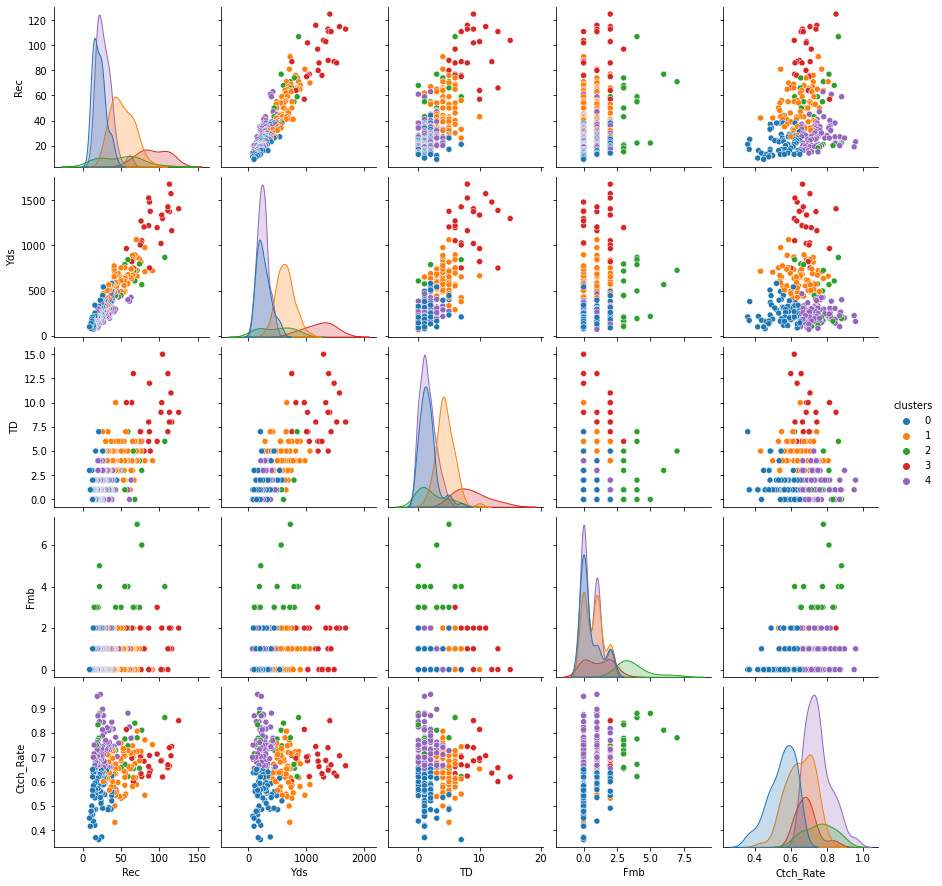

In [12]:
#TODO add your code


## 6. Interpret clusters

### 6.1 Plot cluster proportions 
Use the function `plot_cluster_proportions()` to plot the cluster proportions of the `'clusters'` column in `X`.

Print the cluster counts returned by the function.

Counter({3: 24, 2: 19, 1: 68, 4: 84, 0: 65})

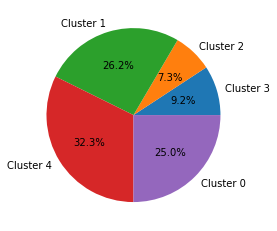

In [13]:
#TODO add your code


### 6.2 Plot cluster means

Use `plot_cluster_centers()` to plot the scaled cluster centers (DataFrame prepared in Step 4.)

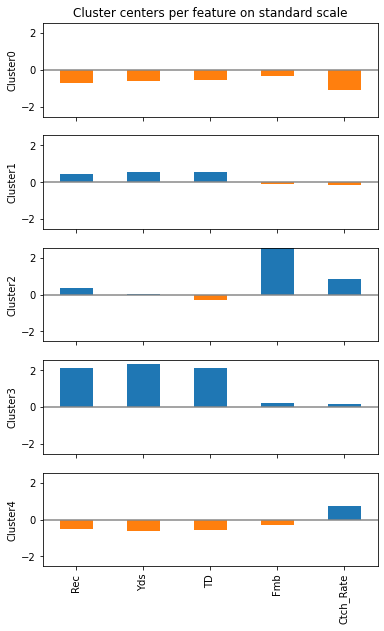

In [14]:
#TODO add your code


## 7. Conclusion

Provide interpretations of the five clusters based on the cluster center plot in Step 6.2.

Interpretations should comment on larger than average and lower than average values. Maybe it is possible to give the cluster a representative name.

For example, noticing that high values of `'Rec', 'Yds', 'TD'` could mean the player ontributes strongly to a teams win. Further more, hugh fumbling `'Fmb'` and low catch rate `'Ctch_Rate'` might *not* contribute to a teams win. With this in mind which cluster represents high, average and low performing receivers?

Assign these five descriptions to the corresponding cluster:
1. Despite catching more than average, lower than average yards and touchdowns.
1. Second best performing receivers with slightly higher than average receptions, yards and touchdowns
1. Lowest performing receivers all variables are below average.
1. Average performing receivers with higher than average catch rate but many fumbles.
1. High performing receivers with higher than average receptions, yards and touchdowns.

Include the size of the cluster (percentage) from the proportions plot.

*YOUR INTERPRETATIONS HERE*

Cluster 0 (*ADD PERCENTAGE*): *ADD DESCRIPTION*

Cluster 1 (*ADD PERCENTAGE*): *ADD DESCRIPTION*

Cluster 2 (*ADD PERCENTAGE*): *ADD DESCRIPTION*

Cluster 3 (*ADD PERCENTAGE*): *ADD DESCRIPTION*

Cluster 4 (*ADD PERCENTAGE*): *ADD DESCRIPTION*

## 8. Reflection

Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.
*ADD YOUR THOUGHTS HERE*
